# Importando bibliotecas e dataset 

In [2]:
import pandas as pd
import numpy as np
import spacy
import nltk
import pt_core_news_sm
from nltk.stem import RSLPStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

c:\Users\55199\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\55199\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\55199\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\55199\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [3]:
df = pd.read_csv('data/erika_hilton.csv', on_bad_lines='skip', sep=';', encoding='utf-8')

C:\Users\55199\AppData\Local\Temp\ipykernel_20368\1077869811.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/erika_hilton.csv', on_bad_lines='skip', sep=';', encoding='utf-8')


In [4]:
# Verificando tweets do user "https://twitter.com/ErikakHilton"
df[df['user'] == "https://twitter.com/ErikakHilton"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3115 entries, 0 to 22503
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       3115 non-null   object 
 1   date                      3115 non-null   object 
 2   rawContent                3115 non-null   object 
 3   renderedContent           3115 non-null   object 
 4   id                        3115 non-null   int64  
 5   user                      3115 non-null   object 
 6   replyCount                3115 non-null   int64  
 7   retweetCount              3115 non-null   int64  
 8   likeCount                 3115 non-null   int64  
 9   quoteCount                3115 non-null   int64  
 10  conversationId            3115 non-null   int64  
 11  lang                      3115 non-null   object 
 12  source                    0 non-null      float64
 13  sourceUrl                 0 non-null      float64
 14  sourceL

# 1.Tokenização

In [5]:
# Instanciando spacy/pt_core_news_sm
nlp = spacy.load('pt_core_news_sm')

In [6]:
# Verificando Tweet
print(df['rawContent'][20])

@ErikakHilton A gata em uma semana trabalhou mais que a familícia inteira em décadas, você é centelha de esperança


In [7]:
# Aplicando tokenização
frase = df['rawContent'][20]
doc = nlp(frase)

In [8]:
# Verificando tokens
doc.text.split()

['@ErikakHilton',
 'A',
 'gata',
 'em',
 'uma',
 'semana',
 'trabalhou',
 'mais',
 'que',
 'a',
 'familícia',
 'inteira',
 'em',
 'décadas,',
 'você',
 'é',
 'centelha',
 'de',
 'esperança']

# Bag of words (BOW)

In [9]:
# Definindo corpus para teste
corpus = [df['renderedContent'][15], df['renderedContent'][20], df['renderedContent'][24], df['renderedContent'][30]]
corpus

['@ErikakHilton Ah obrigado, Erika, já tava aflito sem saber se alguém já tinha tomado providências.',
 '@ErikakHilton A gata em uma semana trabalhou mais que a familícia inteira em décadas, você é centelha de esperança',
 '@ErikakHilton Vc é luz!',
 '@ErikakHilton Minha deputada sempre fazendo tudo!']

In [10]:
# Limpeza inicial
corpus = [item.replace('@ErikakHilton ', '') for item in corpus]
corpus

['Ah obrigado, Erika, já tava aflito sem saber se alguém já tinha tomado providências.',
 'A gata em uma semana trabalhou mais que a familícia inteira em décadas, você é centelha de esperança',
 'Vc é luz!',
 'Minha deputada sempre fazendo tudo!']

In [11]:
# Criando DF com corpus
corpus
df_corpus = pd.DataFrame({'corpus': corpus})
df_corpus

,corpus
0,"Ah obrigado, Erika, já tava aflito sem saber s..."
1,A gata em uma semana trabalhou mais que a fami...
2,Vc é luz!
3,Minha deputada sempre fazendo tudo!


In [12]:
# Importando CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instanciando
tokenizer = CountVectorizer()

# Fit do CountVectorizer
tokenizer.fit(df_corpus.corpus)

CountVectorizer()

In [13]:
# Transformando dados em matriz e aplicando BOW
bow = tokenizer.transform(df_corpus.corpus)
bow

<4x34 sparse matrix of type '<class 'numpy.int64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [14]:
# Transfomando dados em DF para visualização
bow = pd.DataFrame(bow.todense())
bow.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,1,1,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,0,1,1,0,1,2,0,1,...,1,0,0,0,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [15]:
# Atribuindo nomes das colunas aos termos
mapa_vocabulario = {v: k for k, v in tokenizer.vocabulary_.items()}
bow.columns = bow.columns.map(mapa_vocabulario)
bow.head().T

,0,1,2,3
aflito,1,0,0,0
ah,1,0,0,0
alguém,1,0,0,0
centelha,0,1,0,0
de,0,1,0,0
deputada,0,0,0,1
décadas,0,1,0,0
em,0,2,0,0
erika,1,0,0,0
esperança,0,1,0,0


# N-GRAMS

In [16]:
# Instanciando CountVectorizer
tokenizer2 = CountVectorizer(ngram_range=(1,3))     # BOW com uni, bi e trigrams

# Fit do CountVectorizer
tokenizer2.fit(corpus)

CountVectorizer(ngram_range=(1, 3))

In [17]:
# Transformando dados em matriz e aplicando BOW
bow2 = tokenizer2.transform(corpus)
bow2

<4x94 sparse matrix of type '<class 'numpy.int64'>'
	with 94 stored elements in Compressed Sparse Row format>

In [18]:
# Transfomando dados em DF para visualização
bow2 = pd.DataFrame(bow2.todense())
bow2

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,1,1,1,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
# Atribuindo nomes das colunas aos termos
mapa_vocabulario = {v: k for k, v in tokenizer2.vocabulary_.items()}
bow2.columns = bow2.columns.map(mapa_vocabulario)
bow2.head().T

,0,1,2,3
aflito,1,0,0,0
aflito sem,1,0,0,0
aflito sem saber,1,0,0,0
ah,1,0,0,0
ah obrigado,1,0,0,0
...,...,...,...,...
vc,0,0,1,0
vc luz,0,0,1,0
você,0,1,0,0
você centelha,0,1,0,0


# Limpeza

In [21]:
# Definindo stopwords
stopwords_port = nltk.corpus.stopwords.words('portuguese')

In [22]:
# Verificando stopwords
print(stopwords_port)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [23]:
# Removendo a palavra 'não' das stopwords. O 'não' pode ajudar atribuir significados para as frases e delimitar contextos
stopwords_port.remove('não')

In [24]:
# Instanciando CountVectorizer
tokenizer3 = CountVectorizer(ngram_range=(1, 1),
                             stop_words=stopwords_port)

# Fit do CountVectorizer
tokenizer3.fit(corpus)

CountVectorizer(stop_words=['a', 'à', 'ao', 'aos', 'aquela', 'aquelas',
                            'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até',
                            'com', 'como', 'da', 'das', 'de', 'dela', 'delas',
                            'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é',
                            'ela', 'elas', 'ele', 'eles', ...])

In [25]:
# Transformando dados em matriz e aplicando BOW
bow3 = tokenizer3.transform(corpus)
bow3

<4x23 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [26]:
# Transfomando dados em DF para visualização
bow3 = pd.DataFrame(bow3.todense())
bow3

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,1,1,0,0,0,1,0,0,0,...,1,1,1,0,0,1,1,0,0,0
1,0,0,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [27]:
# Atribuindo nomes das colunas aos termos
mapa_vocabulario = {v: k for k, v in tokenizer3.vocabulary_.items()}
bow3.columns = bow3.columns.map(mapa_vocabulario)
bow3.head().T

,0,1,2,3
aflito,1,0,0,0
ah,1,0,0,0
alguém,1,0,0,0
centelha,0,1,0,0
deputada,0,0,0,1
décadas,0,1,0,0
erika,1,0,0,0
esperança,0,1,0,0
familícia,0,1,0,0
fazendo,0,0,0,1


In [28]:
doc = nlp(corpus[0])

In [29]:
doc

Ah obrigado, Erika, já tava aflito sem saber se alguém já tinha tomado providências.

Tentativa de stemming, não funcionando

In [28]:
# stemmer = RSLPStemmer()
# # [stemmer(str(token)) for token in doc]

# for token in doc:
#     stemmer(str(token))

Exemplo de lemmatização, somente aplicação em exemplo para entender a limpeza de dados pela técnica

In [31]:
frase = 'encontrava encontraram encontrarão carro carros carreira carrão'
doc2 =nlp(frase)

In [32]:
[token.lemma_ for token in doc2]

['encontrar', 'encontrar', 'encontrar', 'carro', 'carro', 'carreirar', 'carr']

# TF-IDF

In [30]:
# Transfomando corpus em DF
df_corpus = pd.DataFrame({'corpus': corpus})
df_corpus

,corpus
0,"Ah obrigado, Erika, já tava aflito sem saber s..."
1,A gata em uma semana trabalhou mais que a fami...
2,Vc é luz!
3,Minha deputada sempre fazendo tudo!


In [33]:
# Importando TFIDF do scikit learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Instanciando TFIDF
tfidf = TfidfVectorizer()

# Fit do TFIDF
tfidf.fit(df_corpus.corpus)

TfidfVectorizer()

In [34]:
# Transformando dados para matriz e aplicando BOW
tfidf_mat = tfidf.transform(df_corpus.corpus)
tfidf_mat

<4x34 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [35]:
# Transfomando dados em DF para visualização
df_tfidf = pd.DataFrame(tfidf_mat.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.25,0.25,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,...,0.000000,0.000000,0.25,0.25,0.25,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00,0.00,0.00,0.242536,0.242536,0.000000,0.242536,0.485071,0.00,0.242536,...,0.242536,0.000000,0.00,0.00,0.00,0.242536,0.000000,0.242536,0.000000,0.242536
2,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.707107,0.000000
3,0.00,0.00,0.00,0.000000,0.000000,0.447214,0.000000,0.000000,0.00,0.000000,...,0.000000,0.447214,0.00,0.00,0.00,0.000000,0.447214,0.000000,0.000000,0.000000


In [36]:
# Atribuindo nomes das colunas aos termos
mapa_vocabulario = {v: k for k, v in tfidf.vocabulary_.items()}
df_tfidf.columns = df_tfidf.columns.map(mapa_vocabulario)
df_tfidf.head().T

,0,1,2,3
aflito,0.25,0.000000,0.000000,0.000000
ah,0.25,0.000000,0.000000,0.000000
alguém,0.25,0.000000,0.000000,0.000000
centelha,0.00,0.242536,0.000000,0.000000
de,0.00,0.242536,0.000000,0.000000
deputada,0.00,0.000000,0.000000,0.447214
décadas,0.00,0.242536,0.000000,0.000000
em,0.00,0.485071,0.000000,0.000000
erika,0.25,0.000000,0.000000,0.000000
esperança,0.00,0.242536,0.000000,0.000000


# Part of speech (POS)

In [37]:
# Identificando classes gramaticais
[(token.orth_, token.tag_) for token in doc]

[('Ah', 'ADV'),
 ('obrigado', 'ADJ'),
 (',', 'PUNCT'),
 ('Erika', 'PROPN'),
 (',', 'PUNCT'),
 ('já', 'ADV'),
 ('tava', 'VERB'),
 ('aflito', 'NOUN'),
 ('sem', 'SCONJ'),
 ('saber', 'VERB'),
 ('se', 'SCONJ'),
 ('alguém', 'PRON'),
 ('já', 'ADV'),
 ('tinha', 'AUX'),
 ('tomado', 'VERB'),
 ('providências', 'NOUN'),
 ('.', 'PUNCT')]

# Named entity recognition (NER)

In [53]:
# Selecionando tweet
doc = df['rawContent'][400]
doc

'@ErikakHilton O meu Brasil está feliz e transbordando de amor, hoje!! Vamos continuar lutando, porque é com democracia, educação e emprego que reergeremos esse país!\n\nChega que ódio e armas! ☮️ Paz'

In [54]:
# Tokenização
doc = nlp(doc)

In [55]:
# Identificando entidades
doc.ents

(@ErikakHilton, Brasil)

In [56]:
# Detalhes das entidades
[(entidade, entidade.label_) for entidade in doc.ents]

[(@ErikakHilton, 'PER'), (Brasil, 'LOC')]

# Word embeddings

In [57]:
# Importando Word2Vec (gensim)
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [59]:
# tratamento
punct = ['.', ',', ':', ';', '!', '?']                      # lista de pontuação
stopwords_port = nltk.corpus.stopwords.words('portuguese')  # definindo stowords 
stopwords_port.remove('não')                                # removendo a palavra 'não'

tokens = []
for doc in df.rawContent:
    token = (word_tokenize(doc, language='portuguese'))
    token_lwr = [x.lower() for x in token]                          # caixa baixa
    token_stp = [x for x in token_lwr if x not in stopwords_port]   # remove stopwords
    token_pct = [x for x in token_stp if x not in punct]            # remove pontuações
    tokens.append(token_pct)                                        # adiciona tokens a lista
    
# Cria coluna com tokens sem stopwords
df['tokens_clean'] = tokens


In [61]:
# Instanciando modelo word2vec
w2v_model = Word2Vec(sentences=df.tokens_clean,     # lista de tokens tratados
                     min_count=5,                   # minimo de ocorrencia para considerar a palavra relevante
                     vector_size=400,               # dimensão final do embeding
                     window=5,                      # janela de contexto
                     seed=43                        # fator semi-aleatório
                     )

In [62]:
# visualizando 80 primeiros  valores  do vetor da palavra 'bom'. Não compreendi exatamente essa parte
print(w2v_model.wv.get_vector('bom').shape)
w2v_model.wv.get_vector('bom')[:80]

(400,)


array([-0.01159931, -0.19428   , -0.199879  ,  0.1919036 ,  0.07075251,
       -0.09627388,  0.02642766, -0.26381943,  0.01139489, -0.03186279,
        0.01954043, -0.1439687 ,  0.17287491,  0.24951003, -0.16925369,
       -0.00099272, -0.09422473, -0.01384078,  0.06345117, -0.3394162 ,
       -0.3993806 ,  0.13085209, -0.22456034, -0.03968388,  0.07649587,
       -0.00732046,  0.08123503, -0.06595588, -0.05745128, -0.12831172,
       -0.0637683 , -0.18821678,  0.12369166,  0.11823554,  0.03774415,
        0.00512039, -0.26052362, -0.10771041, -0.25046372,  0.01552452,
        0.02792546, -0.0585388 ,  0.18009008,  0.3906148 ,  0.0569809 ,
        0.05891363, -0.00182833,  0.13576949, -0.08212359, -0.03020401,
        0.12938167, -0.07784838,  0.05511928, -0.10909556,  0.05642816,
        0.13657394, -0.07133859, -0.30812636,  0.07409745,  0.11950412,
       -0.3286239 , -0.112671  ,  0.19645202,  0.06132767, -0.05665277,
       -0.19100216,  0.14252496, -0.15245299, -0.2880466 ,  0.07

# PCA

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# definindo palavras
palavras0 = ['bolsonaro', 'assassino', 'crime', 'terrorista', 'lula', 'violência', 'milícia']

# obtendo vetores
palavra_vec = []

for i in palavras0:
    palavra_vec.append(w2v_model.wv.get_vector(i))

# padronizando     
x = StandardScaler().fit_transform(palavra_vec)

# instanciando PCA
pca = PCA(n_components=2)

# fit PCA
palavra_pca = pca.fit_transform(x)

<Figure size 1440x2880 with 0 Axes>

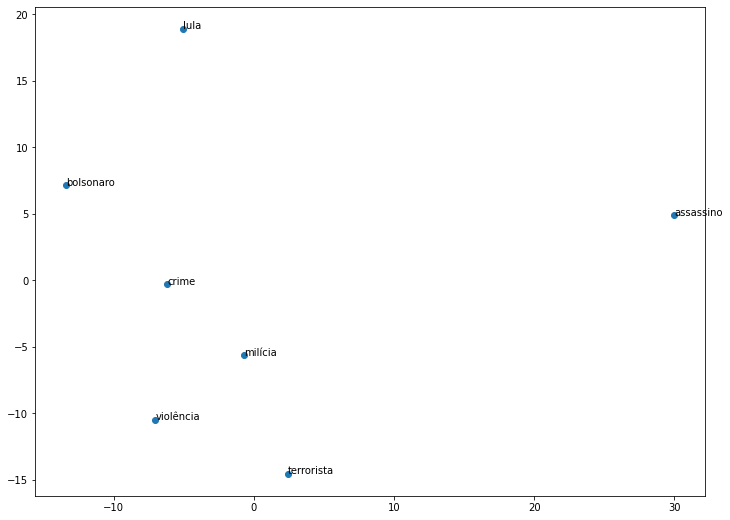

In [88]:
import matplotlib.pyplot as plt

# plotando resultados
eixo_x = []
eixo_y = []

for i in palavra_pca:
    eixo_x.append(i[0])
    eixo_y.append(i[1])
    
plt.figure(figsize=(20, 40))
fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(eixo_x, eixo_y)
for i, txt in enumerate(palavras0):
    ax.annotate(txt, (eixo_x[i], eixo_y[i]))

In [91]:
# averiguando similaridade
vec0 = w2v_model.wv.get_vector('bolsonaro')
w2v_model.wv.most_similar(vec0)

[('bolsonaro', 1.0),
 ('odeia', 0.9589657187461853),
 ('apoia', 0.9553394317626953),
 ('crime', 0.9396253824234009),
 ('peguem', 0.9342613816261292),
 ('mg', 0.9279696941375732),
 ('pobre', 0.9208297729492188),
 ('mente', 0.9133468866348267),
 ('golpe', 0.8999473452568054),
 ('novamente', 0.8902913928031921)]

In [94]:
# averiguando similaridade
vec = w2v_model.wv.get_vector('milícia') + w2v_model.wv.get_vector('bolsonaro')
w2v_model.wv.most_similar(vec)

[('pobre', 0.9856925010681152),
 ('peguem', 0.9835035800933838),
 ('crime', 0.982370913028717),
 ('golpe', 0.9766256213188171),
 ('mg', 0.9742135405540466),
 ('novamente', 0.9654920101165771),
 ('apoia', 0.9639031887054443),
 ('bolsonaro', 0.9624756574630737),
 ('nordeste', 0.9619532227516174),
 ('jefferson', 0.9610544443130493)]

# Modelo 1 de analise de sentimento

In [95]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Tokenização e preprocessamento
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.remove('não')
tfidf = TfidfVectorizer(stop_words=stopwords)
X = tfidf.fit_transform(df['rawContent'])

# treinando algoritmo KMeans cluster para agrupar tweets similares
k = 2  # numero de clusters
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(X)

# rotulando tweets baseado nos clusters
df['sentiment_cluster'] = ['positive' if label == 0 else 'negative' for label in labels]

# Modelo 2 de análise de sentimento

In [96]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Tokenização e preprocessamento
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.remove('não')
cv = CountVectorizer(stop_words=stopwords)
X = cv.fit_transform(df['rawContent'])

# treinando modelo LDA
n_topics = 2  # numero de topicos
lda = LatentDirichletAllocation(n_components=n_topics)
lda.fit(X)

# atribuir os rotulos
topic_sentiments = ['positive', 'negative']
topic_labels = [topic_sentiments[i] for i in lda.transform(X).argmax(axis=1)]

# rotular tweets
df['sentiment_topicmodel'] = topic_labels

# Comparando resultado dos modelos

In [128]:
df[['rawContent', 'sentiment_cluster', 'sentiment_topicmodel']]

,rawContent,sentiment_cluster,sentiment_topicmodel
0,"Ao longo do dia estou recebendo denúncias, inc...",positive,positive
1,@ErikakHilton Simplesmente a maior ❤️❤️❤️ http...,negative,positive
2,@PalasAthenas18 Hahahhaha 💜💜💜,positive,positive
3,"Ao longo do dia estou recebendo denúncias, inc...",positive,positive
4,@ErikakHilton É isso aí...,positive,negative
...,...,...,...
22500,@ErikakHilton @neon_cunha @marciofrancasp @Had...,positive,positive
22501,@ErikakHilton @neon_cunha @marciofrancasp @Had...,positive,negative
22502,"Meus candidatos pra estadual e federal, respec...",positive,negative
22503,@fabio_s_jr @esuplicy Muito obrigada pela forç...,positive,negative


# Modelo 3 de análise de sentimento

In [97]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon') # download do sentiment lexicon

sia = SentimentIntensityAnalyzer() # instanciando sentiment analyzer

# loop pelos tweets e print dos scores
for tweet in df['rawContent']:
    sentiment = sia.polarity_scores(tweet)
    print(tweet)
    print(sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\55199\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Ao longo do dia estou recebendo denúncias, inclusive de pessoas presas há mais de 16h na estrada, sem água e sem comida, pelos bloqueios ilegais dos caminhoneiros.

Por isso, enviei requerimento para que a PRF nos dê informações sobre as dimensões dos atos e providencias tomadas. https://t.co/g0zRPmBLLX
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
@ErikakHilton Simplesmente a maior ❤️❤️❤️ https://t.co/SBA5EPiN7k
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
@PalasAthenas18 Hahahhaha 💜💜💜
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Ao longo do dia estou recebendo denúncias, inclusive de pessoas presas há mais de 16h na estrada, sem água e sem comida, pelos bloqueios ilegais dos caminhoneiros.

Por isso, enviei requerimento para que a PRF nos dê informações sobre as dimensões dos atos e providencias tomadas. https://t.co/g0zRPmBLLX
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
@ErikakHilton É isso aí...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.